In [1]:
## ---------------------------
##
## Coverage analysis - summary
##
## Combining and visualizing the results of the 01.9 parallelized script
## For each species a coverage_stats.tsv file is generated
## Authors: Daria Romanovskaia
##
## Date Created: 2021-11-04
##
##
## ---------------------------

In [2]:
source(file.path(Sys.getenv("CODEBASE"),"DNAmeth500species/src/00.0_init.R"))

Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
Warning message:
“package ‘ggseqlogo’ was built under R version 3.6.3”
Warning message:
“package ‘pheatmap’ was built under R version 3.6.3”
Joining, by = "species"



In [3]:
wd = file.path(analysis_dir, "01_basicStats", "01.9_coverage_analysis")
setwd(wd)

In [4]:
getwd()

[1] "/binfl/lv71484/droman/DNAmeth500species/results_analysis/01_basicStats/01.9_coverage_analysis"

In [5]:
library(patchwork)

Warning message:
“package ‘patchwork’ was built under R version 3.6.3”


In [6]:
dir.create("summary")

Warning message in dir.create("summary"):
“'summary' already exists”


In [7]:
## collecting files with coverage information. We are mostly interested in columns N_rep and N_amp, that indicate the number of repeats

In [7]:
if(!file.exists( "summary/coverage_stats_combined.tsv")){
files = list.files(pattern = "coverage_stats.tsv", recursive = T)

coverage_stats_list <- sapply(files, fread, simplify = FALSE)

coverage_stats <- rbindlist(coverage_stats_list)

coverage_stats[, species:=strsplit(sample, "_")[[1]][1], by = row.names(coverage_stats)]

coverage_stats[, tissue:=strsplit(sample, "_")[[1]][3], by = row.names(coverage_stats)]

coverage_stats <- setDT(left_join(coverage_stats, sp_df))

coverage_stats[, individual := strsplit(sample, "_")[[1]][2], by = row.names(coverage_stats)]
    
coverage_stats[,N_rep_norm:=N_rep/N_frags,]
coverage_stats[,N_amp_norm:=N_amp/N_frags,]
coverage_stats[,N_ind_norm:=N_ind/N_frags,]
    
my_wt(coverage_stats, "summary/coverage_stats_combined.tsv")
}else coverage_stats <- fread( "summary/coverage_stats_combined.tsv")

In [9]:
#### filtering out the samples,excluded from 

sample,N_frags,total_cov,N_rep,N_single,N_ind,N_ind_bg,N_amp,species,tissue,color_class,group,individual,N_rep_norm,N_amp_norm,N_ind_norm
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
AB_1_H,1233503,13696054,7481,284636,241897,28393,14038,AB,H,Reptilia,Rep.,1,0.006064841,0.011380597,0.19610572
AB_1_L,1157846,17492828,7481,96665,60365,215161,3218,AB,L,Reptilia,Rep.,1,0.006461136,0.002779299,0.05213560
AB_2_L,1417575,14477953,7481,99863,105112,72956,6333,AB,L,Reptilia,Rep.,2,0.005277322,0.004467488,0.07414916
AB_2_LU,1181444,12308597,7481,88472,90793,42510,3884,AB,LU,Reptilia,Rep.,2,0.006332082,0.003287502,0.07684918
ABB_1_H,1414520,11970070,1821,208117,165151,140802,9876,ABB,H,Mammalia,Mam.,1,0.001287362,0.006981874,0.11675409
ABB_1_L,1088785,4563383,1821,198674,133225,33680,4759,ABB,L,Mammalia,Mam.,1,0.001672507,0.004370927,0.12236116


In [8]:
coverage_stats <- coverage_stats[sample %in% stats_annot$Sample_Name,]

In [9]:
max(coverage_stats$individual)

[1] 11

In [10]:
coverage_stats[individual==10]

sample,N_frags,total_cov,N_rep,N_single,N_ind,N_ind_bg,N_amp,species,tissue,color_class,group,individual,N_rep_norm,N_amp_norm,N_ind_norm
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
TD_10_LU,993162,21793101,6806,26291,6609,431052,8470,TD,LU,Marsupialia,Mar.,10,0.006852860,0.008528317,0.006654503
ZF_10_Ery,2110874,23229841,18092,63414,11393,242560,2144,ZF,Ery,Actinopteri,Act.,10,0.008570857,0.001015693,0.005397290
ZF_10_LymphoP,2253881,22921034,18109,67634,14388,272163,2315,ZF,LymphoP,Actinopteri,Act.,10,0.008034586,0.001027117,0.006383656


In [26]:
## normalizing the N_rep by the number of fragments

In [11]:
coverage_stats_mean <- coverage_stats %>% 
    group_by(species) %>% 
    summarise(n_tissue = length(unique(tissue)), n_samples = n(), n_indiv = max(individual), N_rep_norm_mean = mean(N_rep_norm),
              N_ind_norm_mean=mean(N_ind_norm), N_amp_norm_mean = mean(N_amp_norm), color_class = first(color_class), group = first(group))

In [12]:
setDT(coverage_stats_mean)

In [13]:
head(coverage_stats_mean)

species,n_tissue,n_samples,n_indiv,N_rep_norm_mean,N_ind_norm_mean,N_amp_norm_mean,color_class,group
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AB,3,4,2,0.006033845,0.09980992,0.005478722,Reptilia,Rep.
ABB,3,4,2,0.002815747,0.09535028,0.004024035,Mammalia,Mam.
ABU,2,8,4,0.008620193,0.02414427,0.001178687,Amphibia,Amp.
AC,3,4,2,0.007769060,0.08419761,0.007300376,Aves,Av.
ACO,2,2,1,0.022430503,0.33309831,0.008745521,Actinopteri,Act.
ACT,2,4,2,0.011360939,0.05592072,0.002360500,Amphibia,Amp.


In [14]:
coverage_stats_m <- melt(coverage_stats_mean,
     measure.vars = c("N_rep_norm_mean", "N_amp_norm_mean",  "N_ind_norm_mean"))

In [15]:

p1 <- ggplot(coverage_stats_m, aes(x = as.factor(n_tissue), y = value, color = color_class)) + 
    geom_jitter() + facet_grid(~variable) + 
    scale_color_manual(values = class_colors) + theme(legend.position = "None")

p2 <- ggplot(coverage_stats_m, aes(x = as.factor(n_samples), y = value, color = color_class)) + 
    geom_jitter() + facet_grid(~variable) + 
    scale_color_manual(values = class_colors) + theme(legend.position = "None") + geom_vline(xintercept = 3.5, linetype = "dashed")

p3 <- ggplot(coverage_stats_m, aes(x = as.factor(n_indiv), y = value, color = color_class)) + 
    geom_jitter() + facet_grid(~variable) + 
    scale_color_manual(values = class_colors) + theme(legend.position = "None")+ geom_vline(xintercept = 1.5, linetype = "dashed")


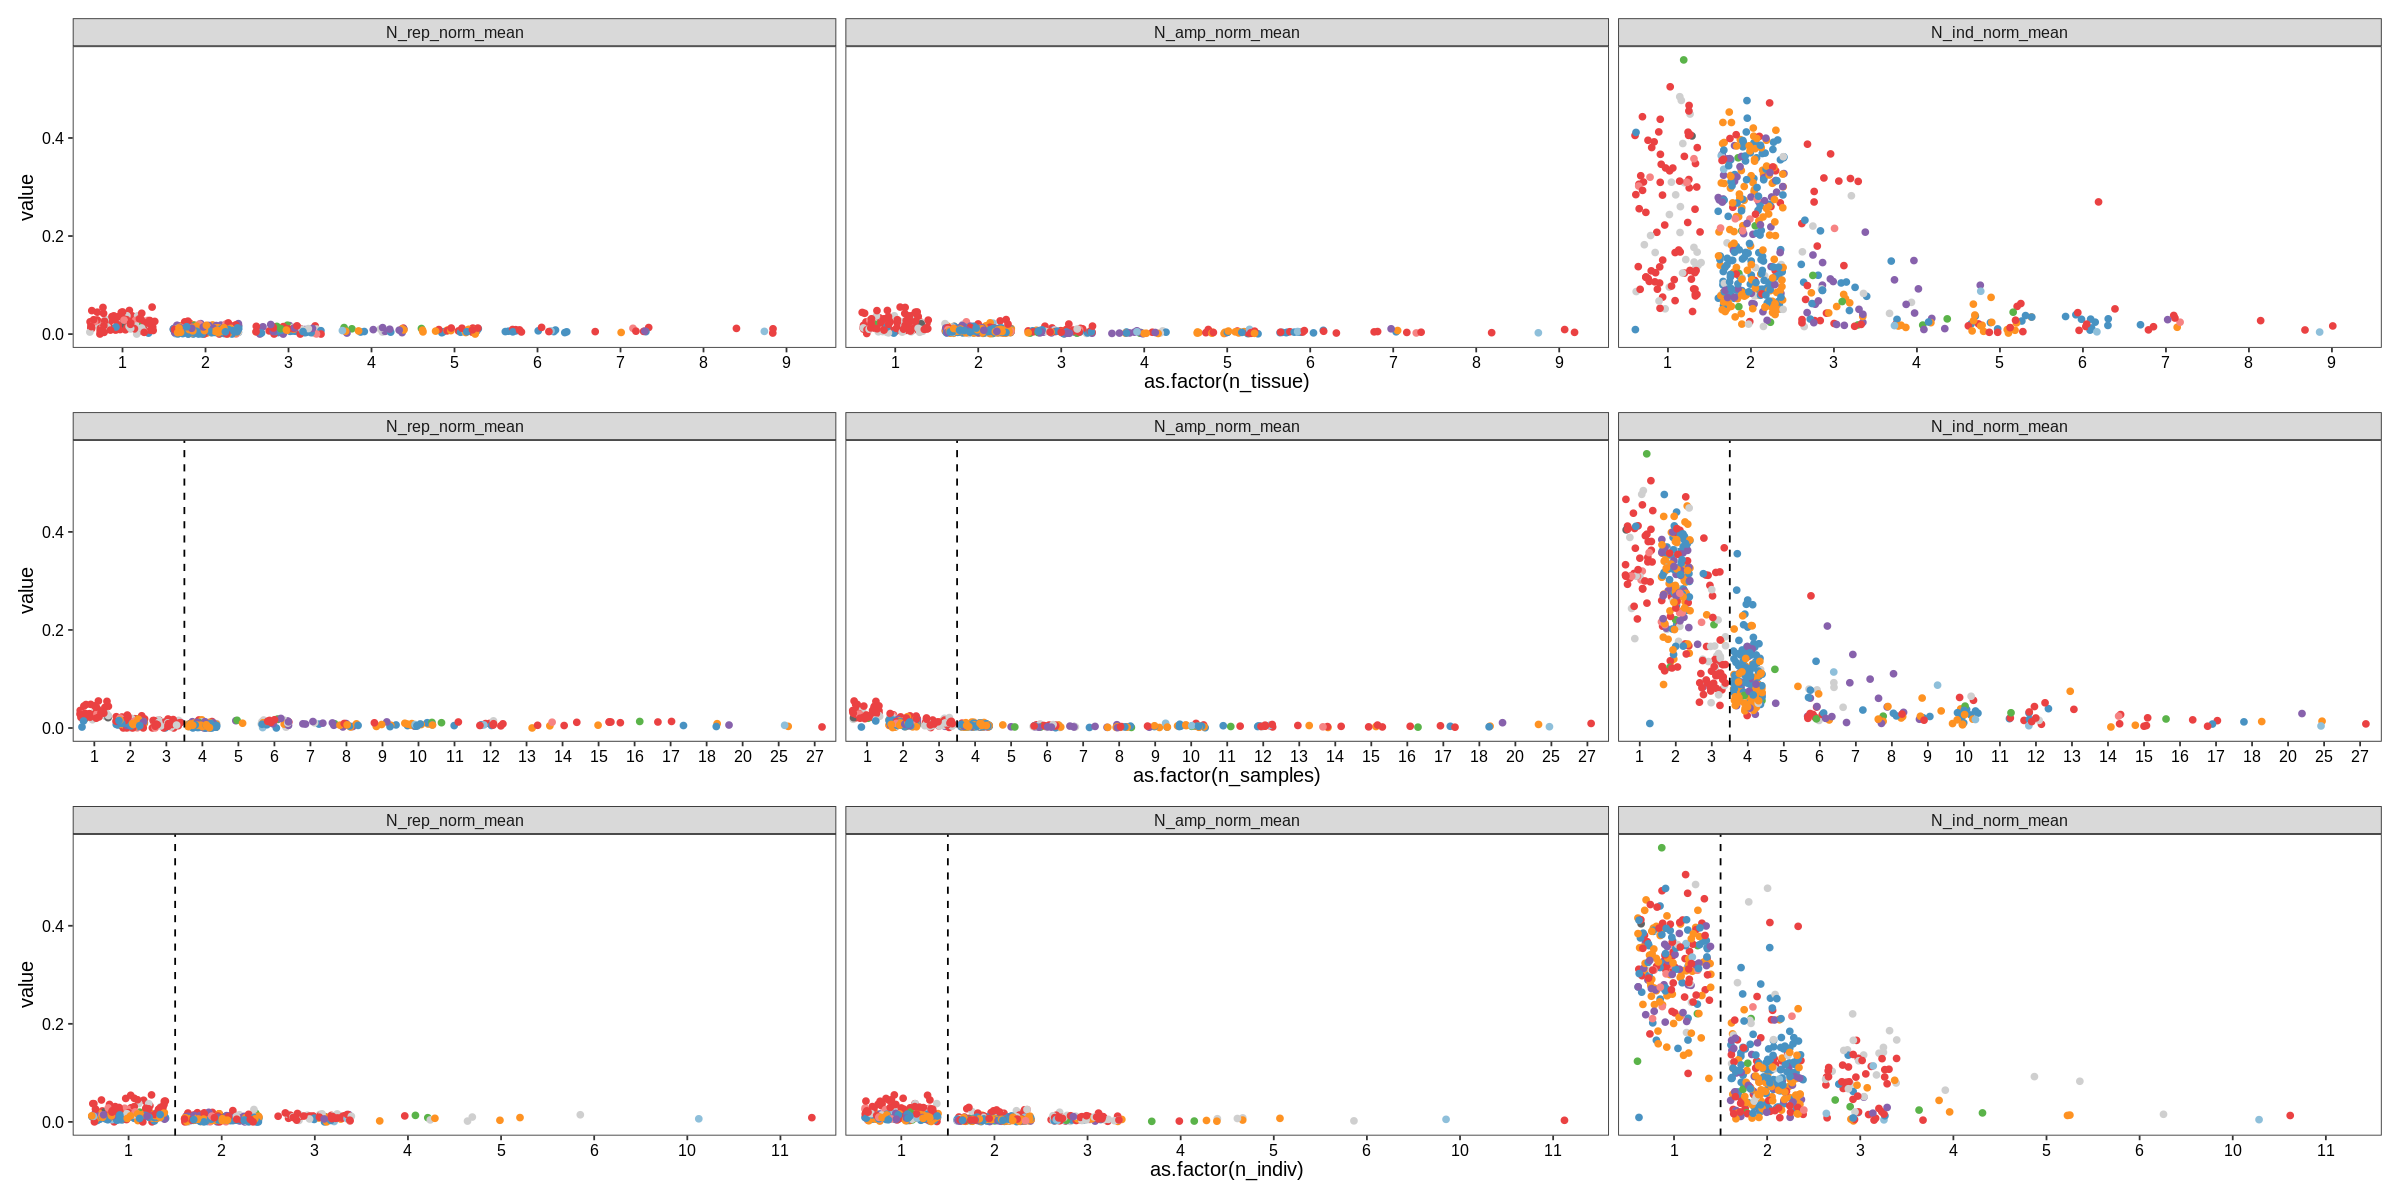

In [16]:
options(repr.plot.width=20, repr.plot.height = 10)
g <- p1/p2/p3
g

In [33]:
ggsave("summary/stats_biases_mean.pdf",g, width = 20, height = 10)

Thresholds:  
1) n_indiv > 1  
2) n_samples > 3

In [17]:
coverage_stats_filtered <- coverage_stats_mean[n_indiv > 1 & n_samples >3]

In [18]:
NROW(coverage_stats_filtered)

[1] 283

In [19]:
NROW(coverage_stats)

[1] 2435

In [37]:
is_outlier <- function(x) {
  return(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x))
}

In [20]:
class_short

Invertebrata Jawless_vertebrate     Chondrichthyes        Actinopteri 
            "Inv."           "Jl.vb."              "Ch."             "Act." 
          Amphibia           Reptilia               Aves        Marsupialia 
            "Amp."             "Rep."              "Av."             "Mar." 
          Mammalia 
            "Mam."

In [21]:
head(coverage_stats_filtered)

species,n_tissue,n_samples,n_indiv,N_rep_norm_mean,N_ind_norm_mean,N_amp_norm_mean,color_class,group
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AB,3,4,2,0.006033845,0.09980992,0.005478722,Reptilia,Rep.
ABB,3,4,2,0.002815747,0.09535028,0.004024035,Mammalia,Mam.
ABU,2,8,4,0.008620193,0.02414427,0.001178687,Amphibia,Amp.
AC,3,4,2,0.007769060,0.08419761,0.007300376,Aves,Av.
ACT,2,4,2,0.011360939,0.05592072,0.002360500,Amphibia,Amp.
AFB,2,4,2,0.001612224,0.12221669,0.011236454,Aves,Av.


In [22]:
coverage_stats_filtered$group <- factor(coverage_stats_filtered$group, levels = class_short)

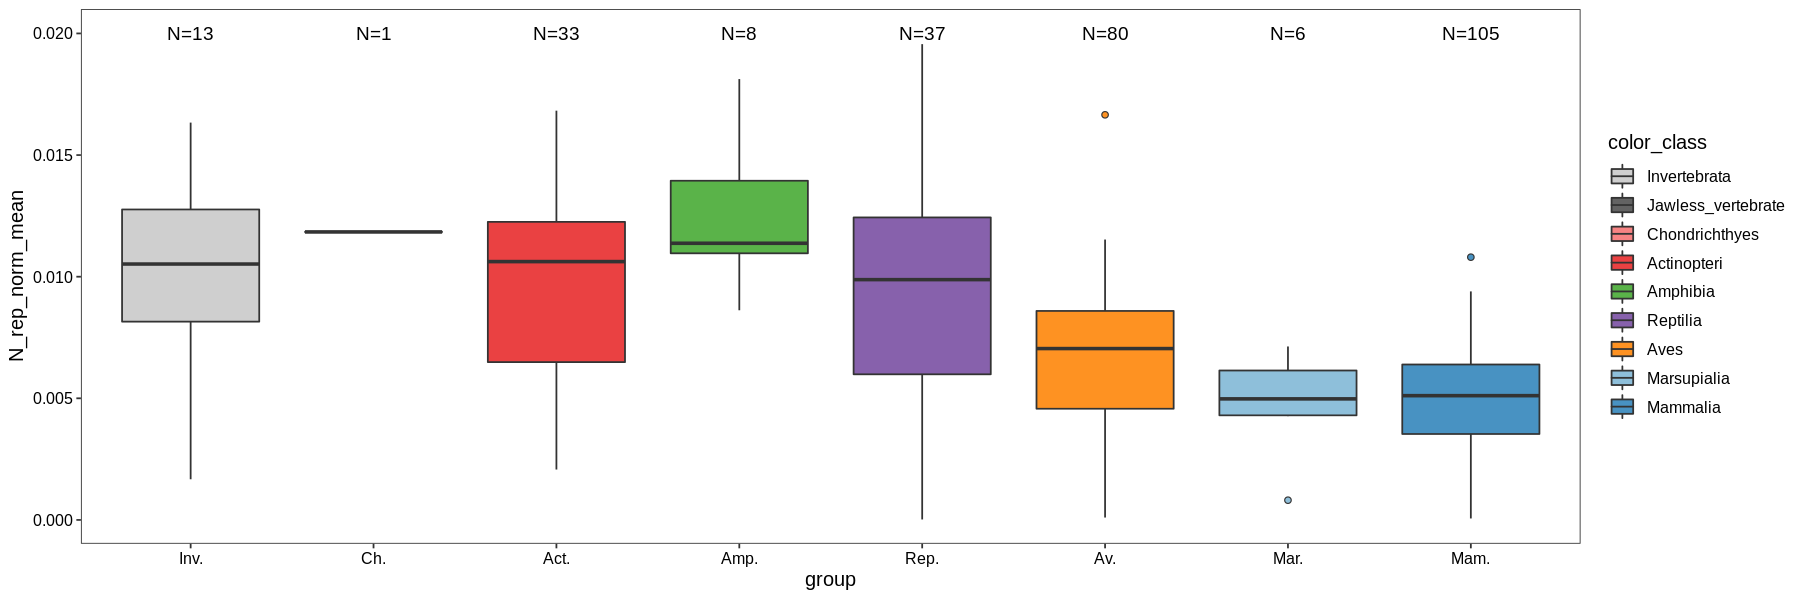

In [23]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(coverage_stats_filtered, aes(x = group, y = N_rep_norm_mean,fill = color_class)) + 
    geom_boxplot(outlier.shape = 21) + 
    #geom_point(data = unique(coverage_stats_filtered[color_class=="Jawless_vertebrate"]),  aes(x = group, y = N_rep_norm,color = color_class)) + 
    scale_fill_manual(values = class_colors) + scale_color_manual(values = class_colors) + 
    stat_summary(fun.data = give.n,fun.args = c(y=0.02), geom = "text",size=4)

In [42]:
ggsave("summary/stats_N_rep_norm_mean.pdf", width = 8, height = 4)

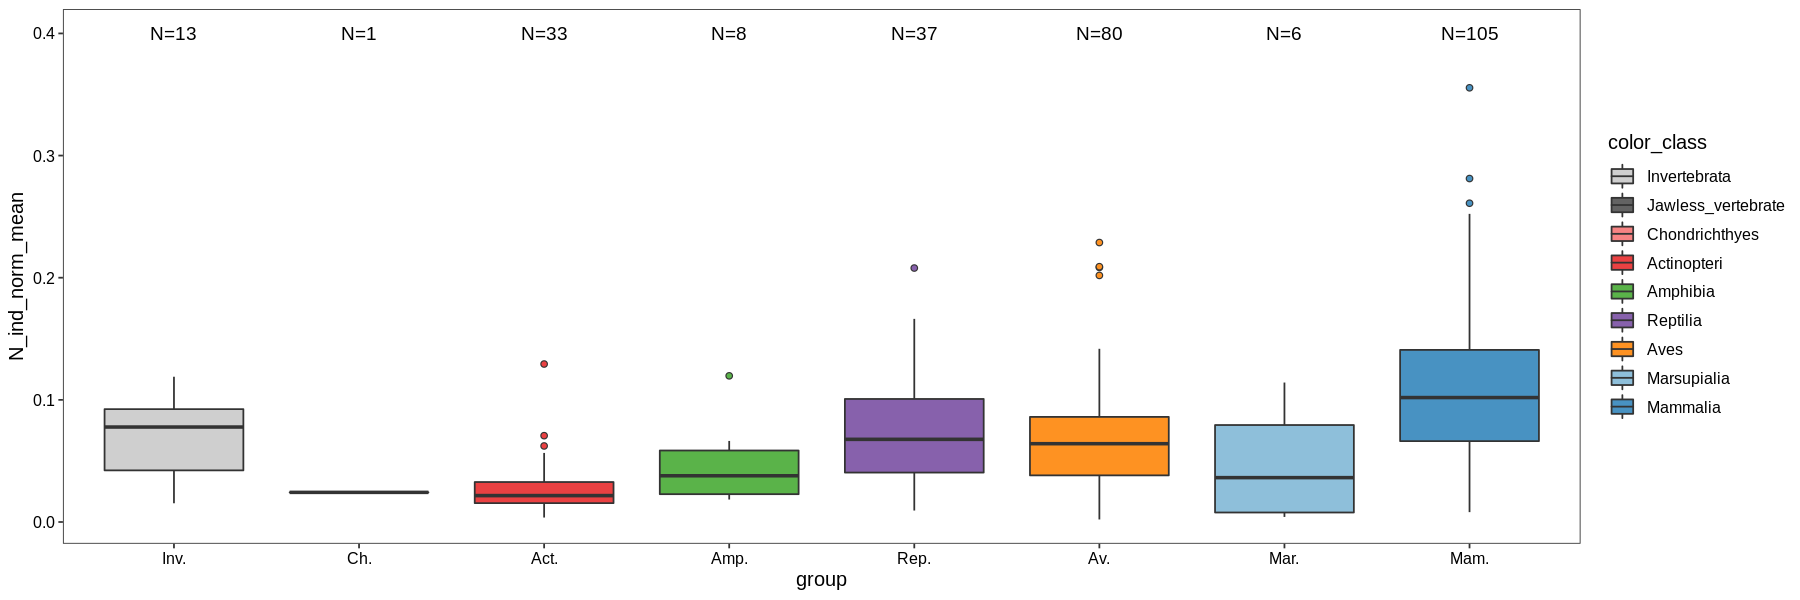

In [43]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(unique(coverage_stats_filtered), aes(x = group, y = N_ind_norm_mean,fill = color_class)) + 
    geom_boxplot(outlier.shape = 21) + 
    scale_fill_manual(values = class_colors) + scale_color_manual(values = class_colors) + 
    stat_summary(fun.data = give.n,fun.args = c(y=0.4), geom = "text",size=4)
ggsave("summary/stats_N_ind_norm_mean.pdf", width = 8, height = 4)

In [47]:
getwd()

[1] "/binfl/lv71484/droman/DNAmeth500species/results_analysis/01_basicStats/01.9_coverage_analysis"

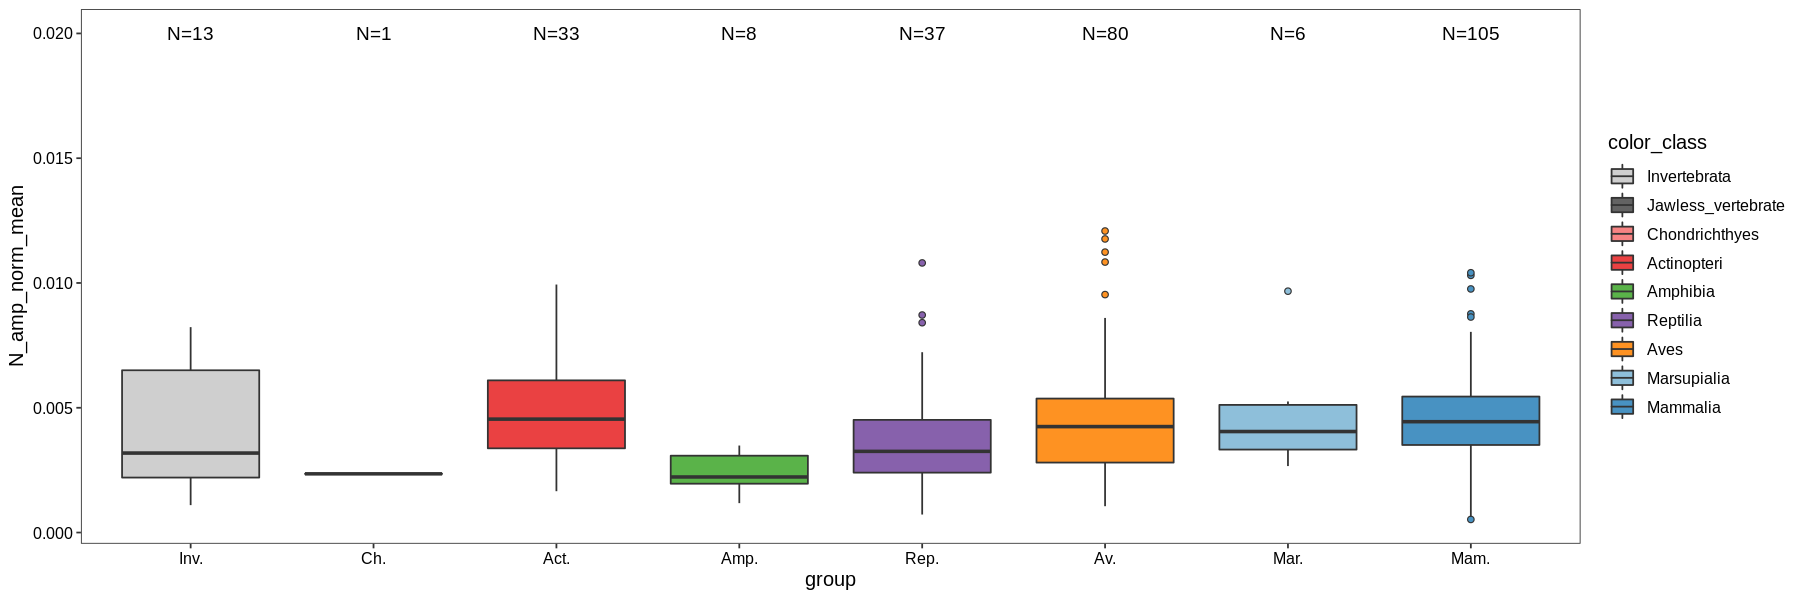

In [44]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(unique(coverage_stats_filtered), aes(x = group, y = N_amp_norm_mean,fill = color_class)) + 
    geom_boxplot(outlier.shape = 21) + 
    scale_fill_manual(values = class_colors) + scale_color_manual(values = class_colors) + 
    stat_summary(fun.data = give.n,fun.args = c(y=0.02), geom = "text",size=4)
ggsave("summary/stats_N_amp_norm_mean.pdf", width = 8, height = 4)

In [48]:
getwd()

[1] "/binfl/lv71484/droman/DNAmeth500species/results_analysis/01_basicStats/01.9_coverage_analysis"

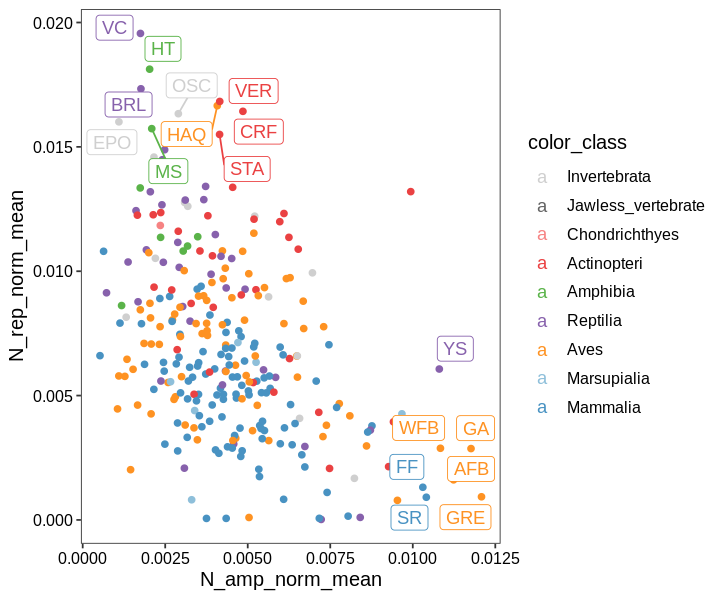

In [45]:
options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(coverage_stats_filtered, aes(x = N_amp_norm_mean, y = N_rep_norm_mean, color = color_class)) + 
    geom_point() + scale_color_manual(values = class_colors) + 
    geom_label_repel(data = coverage_stats_filtered[N_amp_norm_mean>0.01 | N_rep_norm_mean > 0.015, ], aes(x = N_amp_norm_mean, y = N_rep_norm_mean, label = species))

ggsave("summary/stats_N_rep_vs_amp_norm_mean.pdf", width = 6, height = 4)

In [24]:
head(coverage_stats_filtered)

species,n_tissue,n_samples,n_indiv,N_rep_norm_mean,N_ind_norm_mean,N_amp_norm_mean,color_class,group
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
AB,3,4,2,0.006033845,0.09980992,0.005478722,Reptilia,Rep.
ABB,3,4,2,0.002815747,0.09535028,0.004024035,Mammalia,Mam.
ABU,2,8,4,0.008620193,0.02414427,0.001178687,Amphibia,Amp.
AC,3,4,2,0.007769060,0.08419761,0.007300376,Aves,Av.
ACT,2,4,2,0.011360939,0.05592072,0.002360500,Amphibia,Amp.
AFB,2,4,2,0.001612224,0.12221669,0.011236454,Aves,Av.


## n_imp vs filtered

In [25]:
head(coverage_stats)

sample,N_frags,total_cov,N_rep,N_single,N_ind,N_ind_bg,N_amp,species,tissue,color_class,group,individual,N_rep_norm,N_amp_norm,N_ind_norm
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
AB_1_H,1233503,13696054,7481,284636,241897,28393,14038,AB,H,Reptilia,Rep.,1,0.006064841,0.011380597,0.19610572
AB_1_L,1157846,17492828,7481,96665,60365,215161,3218,AB,L,Reptilia,Rep.,1,0.006461136,0.002779299,0.05213560
AB_2_L,1417575,14477953,7481,99863,105112,72956,6333,AB,L,Reptilia,Rep.,2,0.005277322,0.004467488,0.07414916
AB_2_LU,1181444,12308597,7481,88472,90793,42510,3884,AB,LU,Reptilia,Rep.,2,0.006332082,0.003287502,0.07684918
ABB_1_H,1414520,11970070,1821,208117,165151,140802,9876,ABB,H,Mammalia,Mam.,1,0.001287362,0.006981874,0.11675409
ABB_1_L,1088785,4563383,1821,198674,133225,33680,4759,ABB,L,Mammalia,Mam.,1,0.001672507,0.004370927,0.12236116


In [29]:
coverage_stats <- left_join(coverage_stats, stats_annot[, c("Sample_Name", "Enrichment cycles")], by = c("sample" = "Sample_Name"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



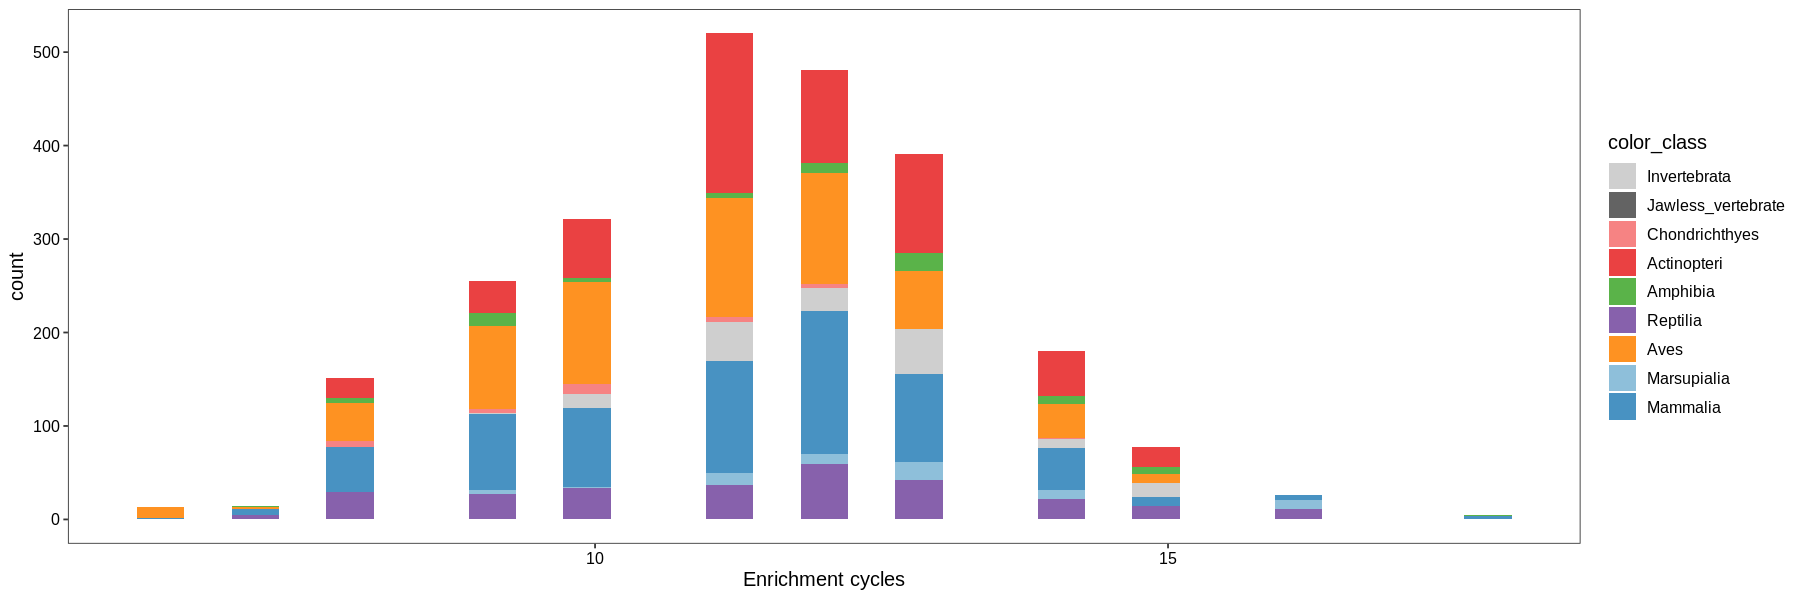

In [31]:
ggplot(coverage_stats, aes(x = `Enrichment cycles`, fill = color_class)) + 
                geom_histogram() + 
                scale_fill_manual(values = class_colors)

In [32]:
setDT(coverage_stats)

In [34]:
coverage_stats <- coverage_stats[species %in%coverage_stats_filtered$species ]

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


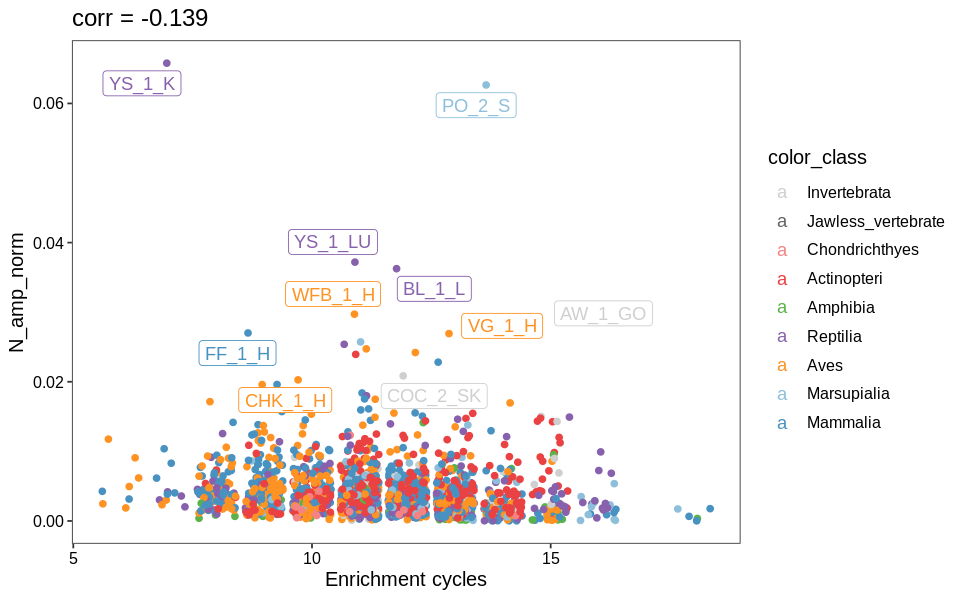

In [48]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(coverage_stats, aes(y = N_amp_norm, x = `Enrichment cycles`, color = color_class)) + 
    geom_jitter() + scale_color_manual(values = class_colors) + 
    geom_label_repel(data = coverage_stats[N_amp_norm>0.02, ], aes(y = N_amp_norm, x = `Enrichment cycles`, label = sample)) + 
    ggtitle(paste0("corr = ", round(cor(coverage_stats$N_amp_norm, coverage_stats$`Enrichment cycles`),3)))

ggsave("summary/stats_PCR_vs_amp_norm.pdf", width = 6, height = 4)

In [54]:
coverage_stats$color_class <- factor(coverage_stats$color_class, levels = names(class_colors))

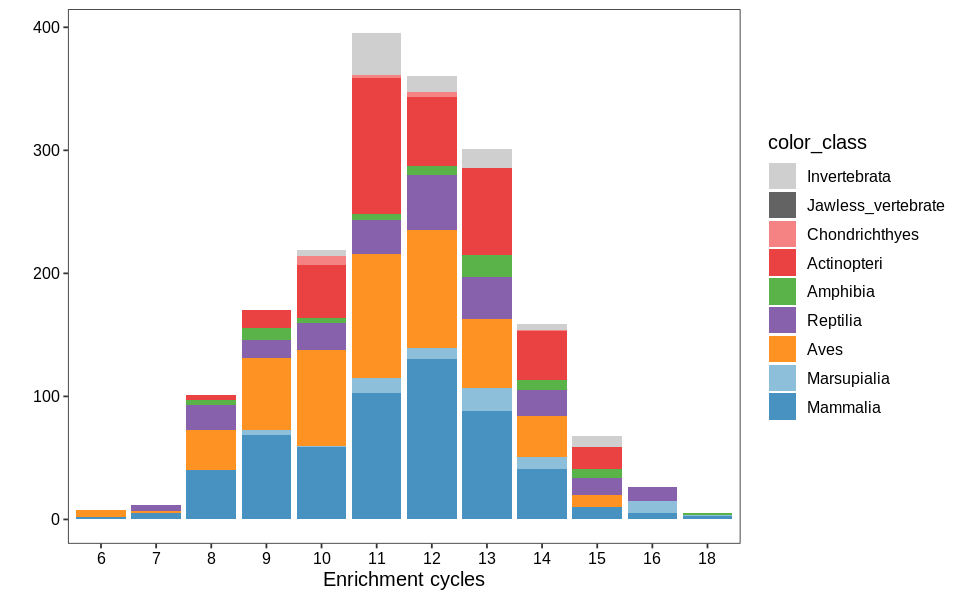

In [55]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(coverage_stats, aes( x = as.factor(`Enrichment cycles`), fill = color_class)) + 
    geom_bar() + scale_fill_manual(values = class_colors) + xlab("Enrichment cycles") + ylab("")

ggsave("summary/PCR_count.pdf", width = 6, height = 4)

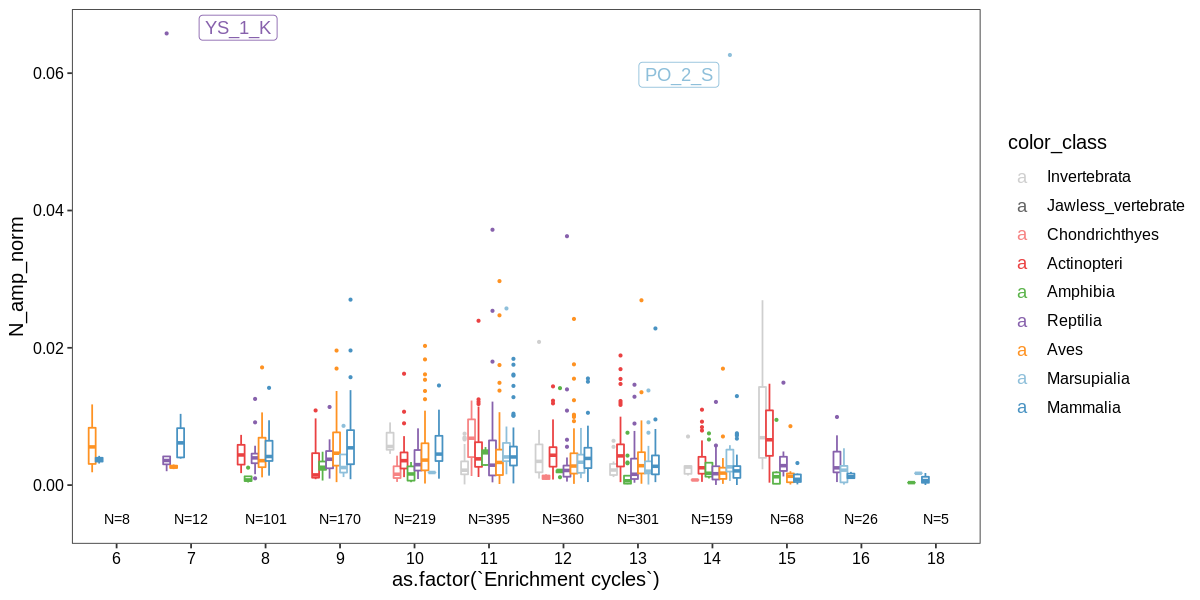

In [78]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(coverage_stats, aes(y = N_amp_norm, x = as.factor(`Enrichment cycles`))) + 
    geom_boxplot(aes(, color = color_class), outlier.size = 0.5, position = position_dodge(preserve = "single")) +
        scale_color_manual(values = class_colors) + 
        stat_summary(fun.data = give.n,fun.args = c(y=-0.005), geom = "text",size=3)+
    geom_label_repel(data = coverage_stats[N_amp_norm>0.04, ], 
                   aes(y = N_amp_norm, x = as.factor(`Enrichment cycles`),color = color_class, label = sample))
ggsave("summary/PCR_n_amp.pdf", width = 9, height = 4)

In [79]:
getwd()

[1] "/binfl/lv71484/droman/DNAmeth500species/results_analysis/01_basicStats/01.9_coverage_analysis"